###1. Khai báo thư viện

In [13]:
# Importing Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

# Importing Machine Learning Library
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

In [14]:
#tạo quyền truy cập và lấy dữ liệu từ google drive
#from google.colab import drive
#rive.mount('/content/drive')
#đọc dữ liệu
dataset=pd.read_csv('smoking.csv')

###2. Đọc dữ liệu

In [15]:
dataset.shape

(1691, 13)

In [16]:
dataset.head(7)

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
5,6,Female,37,Married,GCSE/O Level,British,White,"15,600 to 20,800",The North,No,NaN,NaN,NaN
6,7,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets


#### Giải thích các cột dữ liệu

*   Unnamed : STT trong dánh sách
*   gender: Giới tính (Male/Female)
*   age: Độ tuổi
*   marital_status: Tình trạng hôn nhân (Divorced, Married, Separated, Single and Widowed)
*   highest_qualification: Trình độ học vấn (A Levels, Degree, GCSE/CSE, GCSE/O Level, Higher/Sub Degree, No Qualification, ONC/BTEC and Other/Sub Degree )
*   nationally: Quốc gia (British, English, Irish, Scottish, Welsh, Other, Refused and Unknown)
* ethnicity: Dân tộc (Asian, Black, Chinese, Mixed, White and Refused Unknown)
* gross_income: Thu nhập (Under 2,600; 2,600 - 5,200; 5,200 - 10,400; 10,400 - 15,600; 15,600 - 20,800; 20,800 - 28,600; 28,600 - 36,400, Above 36,400; Refused and Unknown)
* region: Khu vực (London, Midlands And East Anglia, Scotland, South East, South West, The North and Wales)
* smoke: Tình trạng hút thuốc (Yes/No)
* amt_weekends: Số điếu hút vào ngày cuối tuần
* amt_weekdays: Số điêu hút vào các ngày trong tuần
* type: Loại thuốc hút (Packets, Hand-Rolled, Both/Mainly Packets and Both/Mainly -Hand-Rolled)



In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


###3. Làm sạch dữ liệu

####3.1. Xóa bỏ cột không không cần thiết

In [18]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

#### 3.2. Xử lý dữ liệu bị trùng lặp

In [19]:
dataset.duplicated().sum()

21

In [20]:
dataset.drop_duplicates(inplace=True)

In [21]:
dataset.duplicated().sum()

0

#### 3.3. Xử lý các dữ liệu bị thiếu

In [22]:
dataset.isnull().sum()

gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1249
amt_weekdays             1249
type                     1249
dtype: int64

* Xử lý các giá trị null ở cột 'amt_weekends', 'amt_weekdays' bằng cách chọn những hàng 'smoke' = 0 và đặt các giá trị null của hai cột trên thành 0 cho các hàng đó.

In [23]:
no_smoke_rows = dataset.loc[dataset['smoke'] == 'No']
dataset.loc[no_smoke_rows.index, ['amt_weekends', 'amt_weekdays']] = 0

* Xử lý các giá trị null ở cột 'type' bằng cách chọn những hàng 'smoke' = 0 và đặt các giá trị null của cột này thành 0 cho các hàng đó.

In [24]:
no_smoke_rows = dataset.loc[dataset['smoke'] == 'No']
dataset.loc[no_smoke_rows.index, 'type'] = 'Non-Smoker'

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1670 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1670 non-null   object 
 1   age                    1670 non-null   int64  
 2   marital_status         1670 non-null   object 
 3   highest_qualification  1670 non-null   object 
 4   nationality            1670 non-null   object 
 5   ethnicity              1670 non-null   object 
 6   gross_income           1670 non-null   object 
 7   region                 1670 non-null   object 
 8   smoke                  1670 non-null   object 
 9   amt_weekends           1670 non-null   float64
 10  amt_weekdays           1670 non-null   float64
 11  type                   1670 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 234.1+ KB


In [26]:
dataset.head(7)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,0.0,0.0,Non-Smoker
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,0.0,0.0,Non-Smoker
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,0.0,0.0,Non-Smoker
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,0.0,0.0,Non-Smoker
5,Female,37,Married,GCSE/O Level,British,White,"15,600 to 20,800",The North,No,0.0,0.0,Non-Smoker
6,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets


####3.4. Thay đổi kiểu dữ liệu

* Đổi các biến object thành các biến category (phân loại)

In [27]:
cols = ["gender", "marital_status", "highest_qualification",'nationality','ethnicity', 'gross_income','region','smoke']
dataset[cols] = dataset[cols].astype('category')
pd.DataFrame(dataset.dtypes).T

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,category,int64,category,category,category,category,category,category,category,float64,float64,object


### 4. Trực quan hóa dữ liệu

#### 4.1. Phân tích đơn biến
##### 4.1.1 Biến phân loại


* Gender

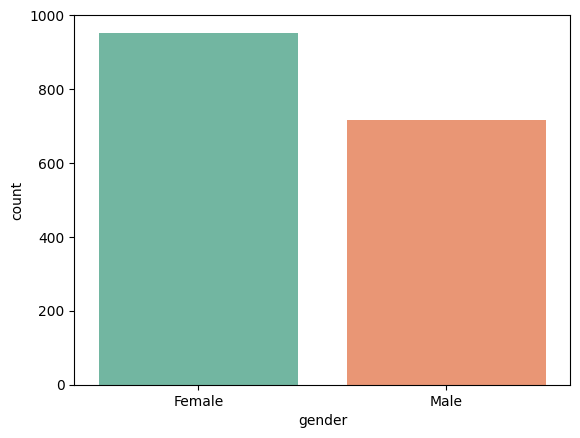

In [28]:
sns.countplot(x ='gender', data = dataset, palette='Set2')
plt.show()

* Marital Status

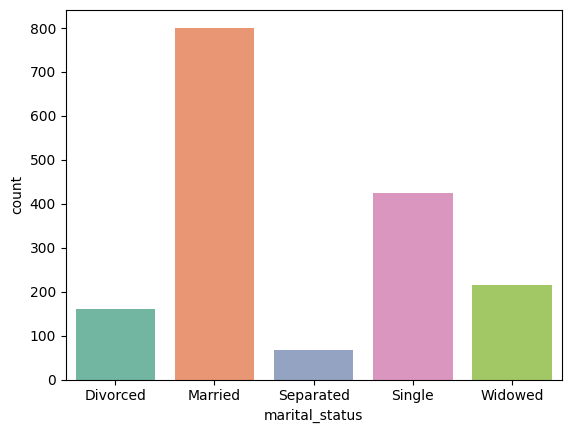

In [29]:
sns.countplot(x='marital_status', data = dataset, palette='Set2')
plt.show()

* Highest Qualification

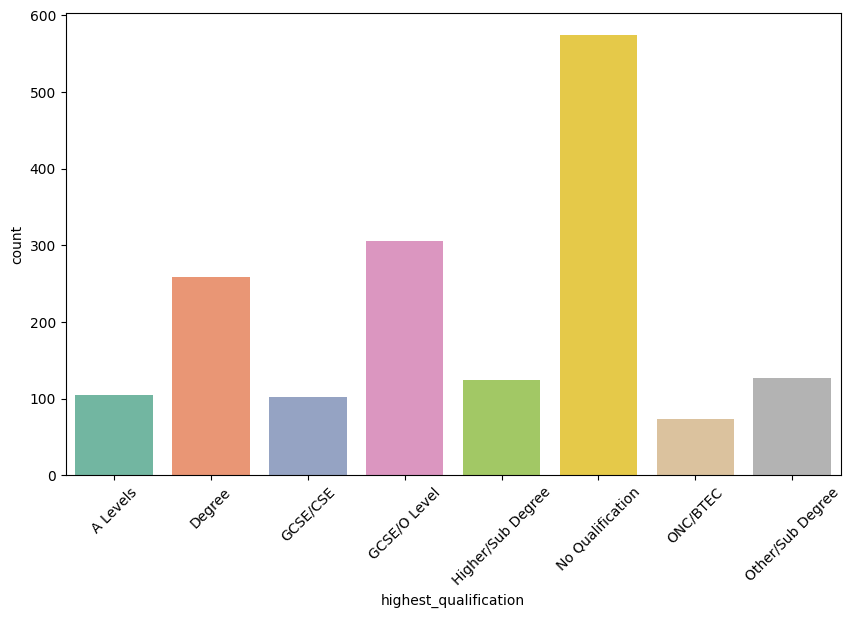

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='highest_qualification', data=dataset, palette='Set2')
plt.xticks(rotation=45)
plt.show()

* Nationality

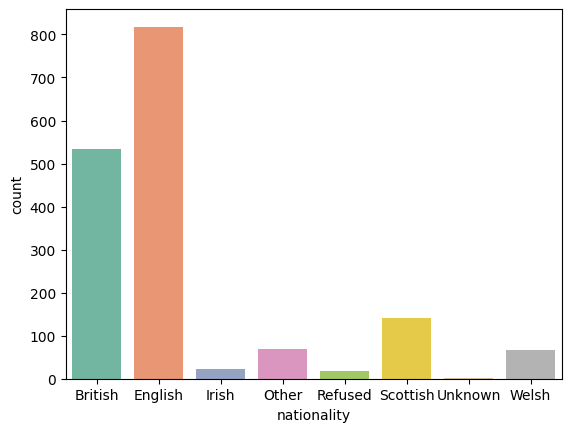

In [31]:
sns.countplot(x='nationality', data = dataset, palette='Set2')
plt.show()

* Ethnicity

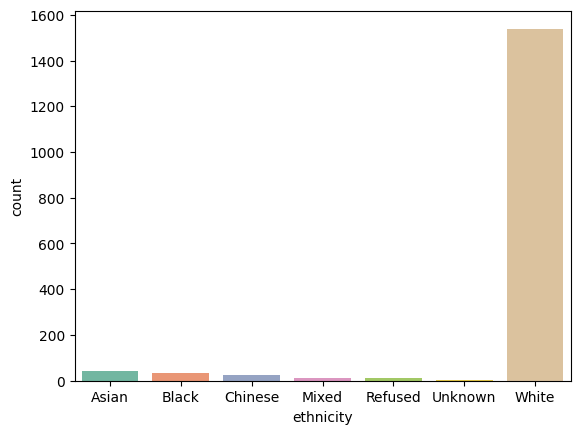

In [32]:
sns.countplot(x='ethnicity', data=dataset, palette='Set2' )
plt.show()

* Region

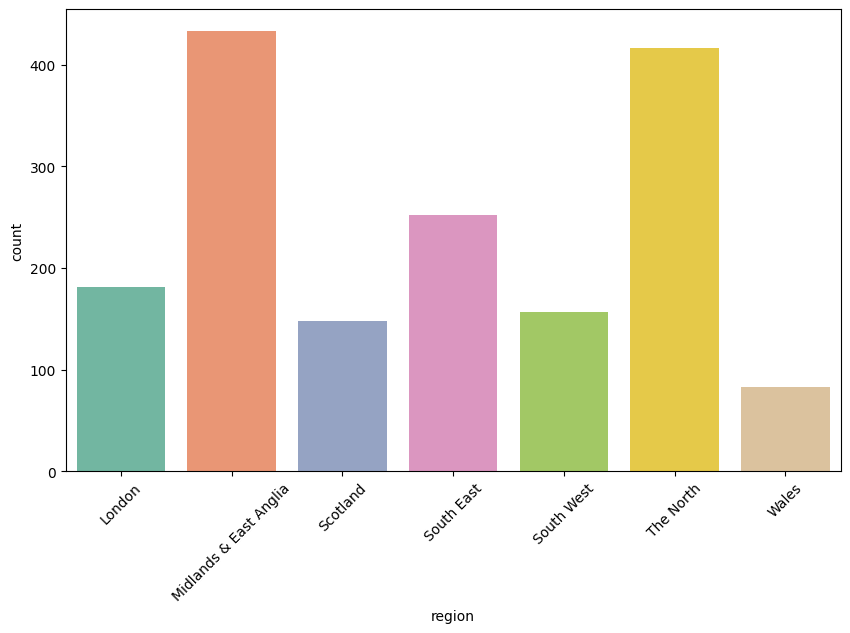

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='region', data=dataset, palette='Set2')
plt.xticks(rotation=45)
plt.show()

* Smoke

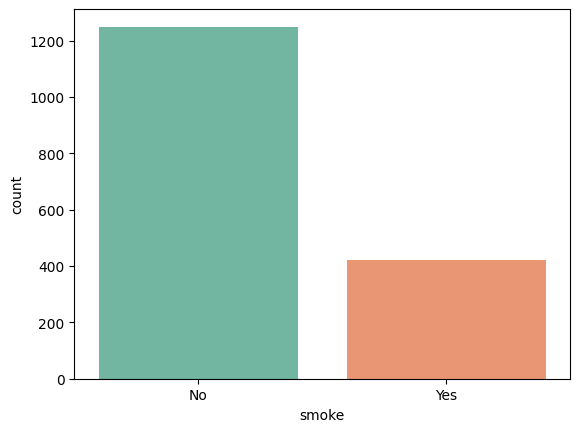

In [34]:
sns.countplot(x='smoke', data = dataset, palette='Set2')
plt.show()

* Type

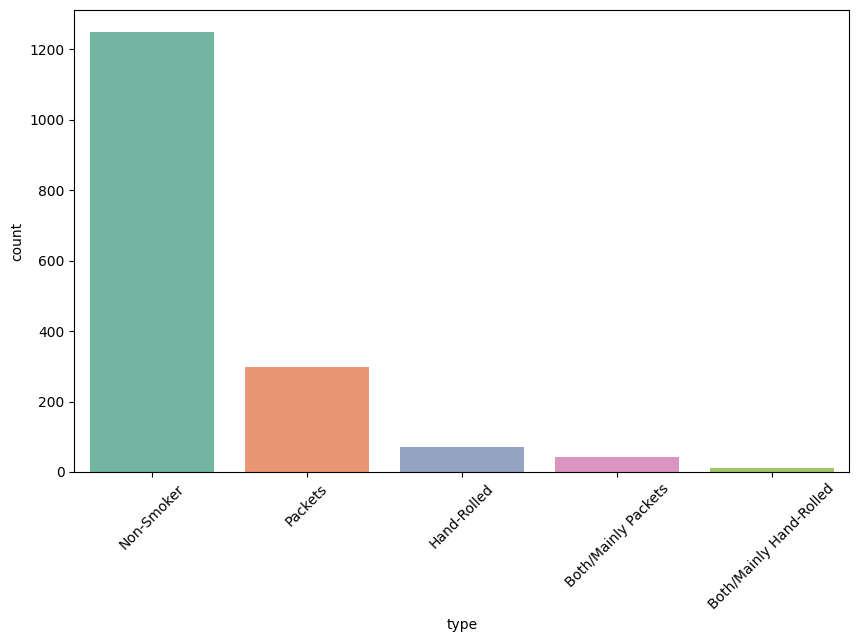

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=dataset, palette='Set2')
plt.xticks(rotation=45)
plt.show()

* Gross Income

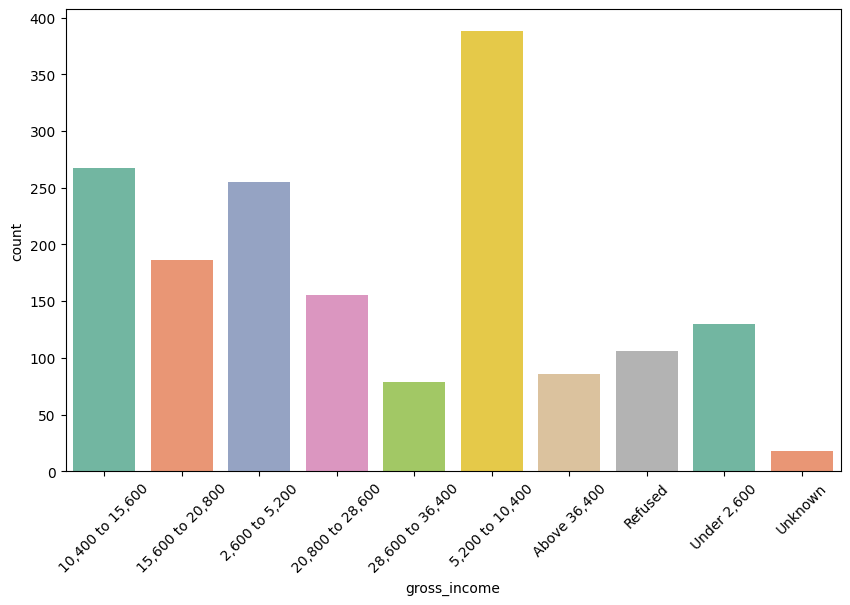

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='gross_income', data=dataset, palette='Set2')
plt.xticks(rotation=45)
plt.show()


Nhận xét:
1. Giới tính: Nữ giới chiếm tỷ lệ cao hơn nam giới
2. Tình trạng hôn nhân: Kết hôn chiếm đại đa số
3. Trình độ học vấn: Người không có trình độ học vấn chiếm số đông
4. Quốc tịch: English chiếm số đông
5. Dân tộc: Người da trắng nhiều hơn
6. Thu nhập: Người có thu nhập 5,200 - 10,400 có số lượng cao nhất, sau đó là từ 10,400 - 15,600. Vậy bộ dữ liệu cho thấy có nhiều người có thu nhập thấp hơn
7. Khu vực: "Midlands & East Anglia" và "The North" có số lượng đông nhất. Cho thấy bộ dữ liệu tập trung ở một số khu vực nhất định ở UK
8. Tình trạng hút thuốc: Phần lớn người tra lười không hút thuốc cao hơn người hút thuốc

##### 4.1.2. Biến số

* Age

In [39]:
hist_fig= px.histogram(dataset, x='age', title='Agewise Distribution')
hist_fig.update_traces(marker_color='orange', opacity=0.7)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'age=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'orange', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'opacity': 0.7,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array([38, 42, 40, ..., 45, 51, 31], dtype=int64),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Agewise Distribution'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'age'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

* Amount consumed over weekends

In [38]:
hist_fig= px.histogram(dataset, x='amt_weekends', title='Amount consumed over weekends Distribution')
hist_fig.update_traces(marker_color='orange', opacity=0.7)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'amt_weekends=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'orange', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'opacity': 0.7,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array([ 0., 12.,  0., ...,  0., 20.,  0.]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Amount consumed over weekends Distribution'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'amt_weekends'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

* Amount consumed over weekdays

In [40]:
hist_fig= px.histogram(dataset, x='amt_weekdays', title='Amount consumed over weekends Distribution')
hist_fig.update_traces(marker_color='orange', opacity=0.7)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'amt_weekdays=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'orange', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'opacity': 0.7,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array([ 0., 12.,  0., ...,  0., 20.,  0.]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Amount consumed over weekends Distribution'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'amt_weekdays'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

Nhận xét:
1. age: Phần lớn người trả lời tập trung ở độ tuổi 30 - 50
2. amt_weekends: Phần lớn người trả lời số điếu thuốc sử dụng vào cuối tuần là 0
3. amt_weekdays: Phần lớn người trả lời số điếu thuốc sử dụng các ngày trong tuần là 0

#### 4.2. Phân tích đa biến

* gender vs smoke

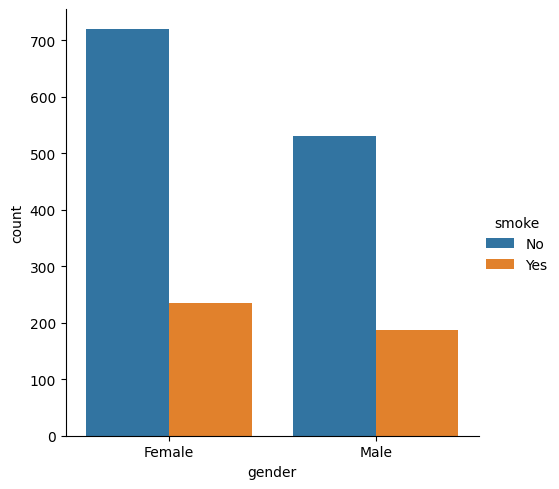

In [41]:
sns.catplot(x="gender", hue="smoke", kind="count", data=dataset)

* age vs smoke

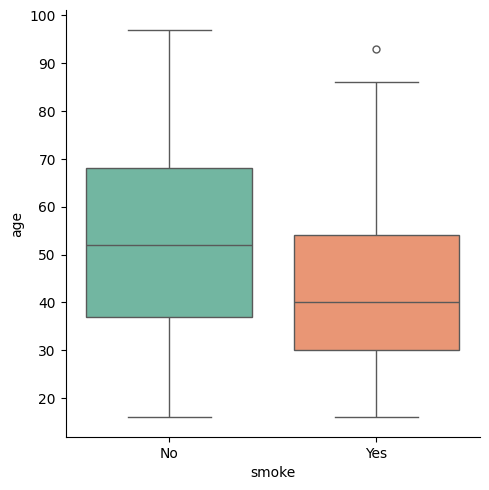

In [42]:
sns.catplot(x="smoke", y="age", kind="box", data=dataset, palette= 'Set2')

* marital_status vs smoke

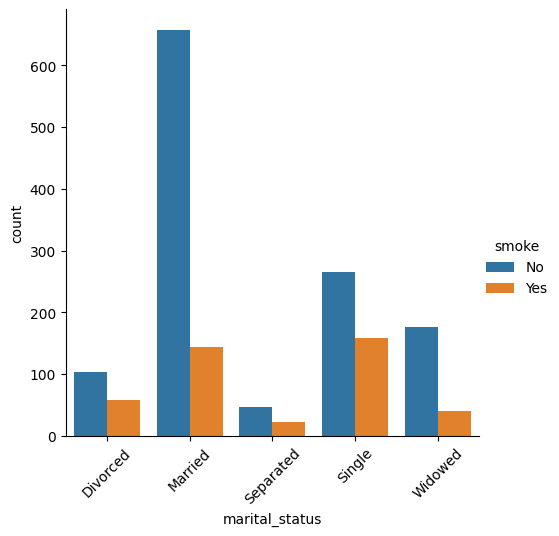

In [43]:
sns.catplot(x="marital_status", hue="smoke", kind="count", data=dataset)
plt.xticks(rotation=45)
plt.show()

* nationality vs smoke

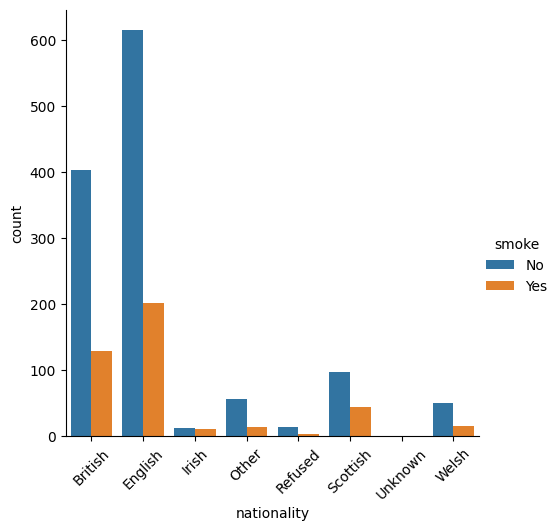

In [44]:
sns.catplot(x="nationality", hue="smoke", kind="count", data=dataset)
plt.xticks(rotation=45)
plt.show()

* ethnicity vs smoke

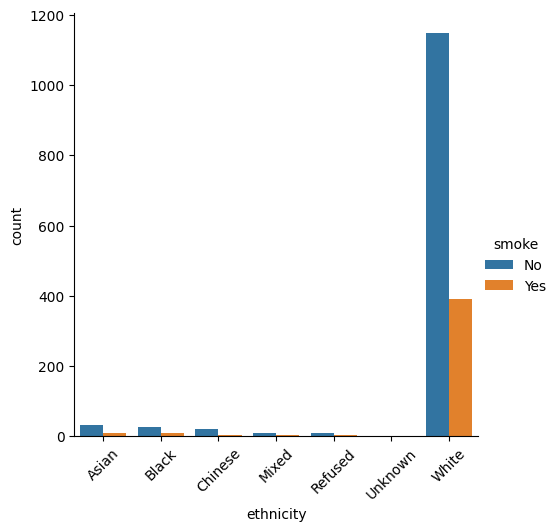

In [45]:
sns.catplot(x="ethnicity", hue="smoke", kind="count", data=dataset)
plt.xticks(rotation=45)
plt.show()

* highest_qualification vs smoke

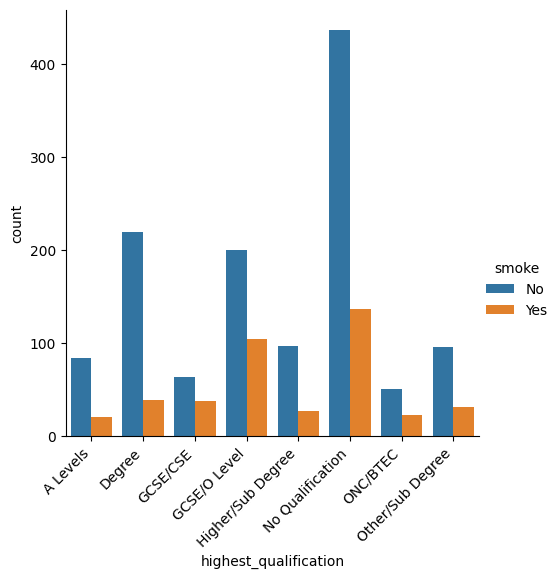

In [46]:
ax = sns.catplot(x="highest_qualification", hue="smoke", kind="count", data=dataset)
ax.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

* gross_income vs smoke

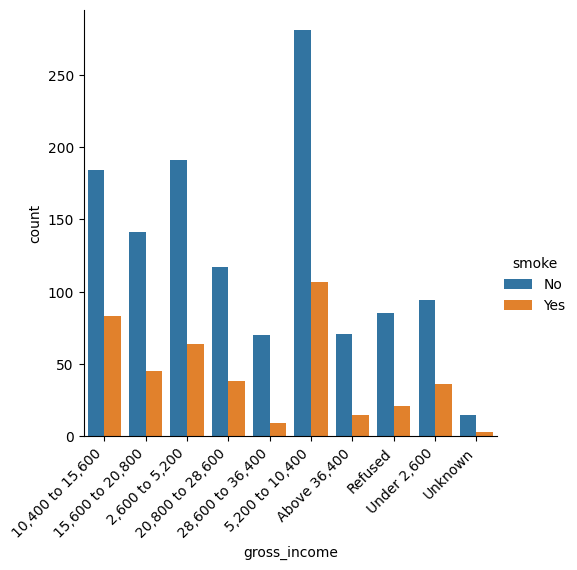

In [47]:
ax = sns.catplot(x="gross_income", hue="smoke", kind="count", data=dataset)
ax.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

* region vs smoke

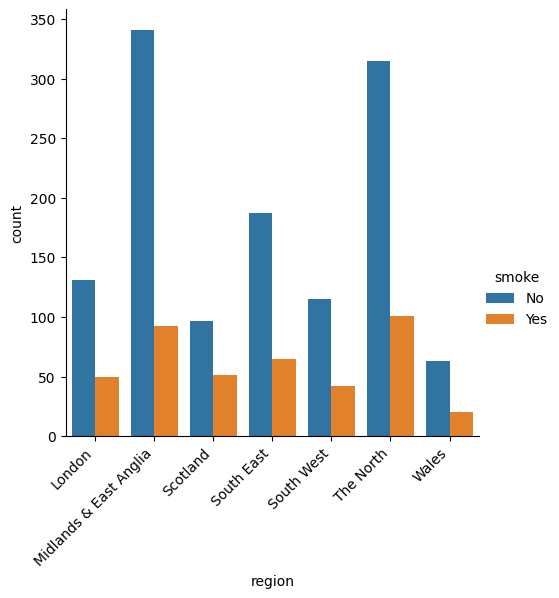

In [48]:
ax = sns.catplot(x="region", hue="smoke", kind="count", data=dataset)
ax.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

Nhận xét:


### 5. Xây dựng tập dữ liệu train và test

In [49]:
data = dataset

* Loại bỏ các cột không cần thiết

Vì mô hình sẽ dự đoán người nào hút thuốc vào người nào không hút thuốc, nên 3 cột 'type', 'amt_weekends', 'amt_weekdays' sẽ không có ý nghĩa để dự đoán.

In [54]:
drop_col = ['type', 'amt_weekends', 'amt_weekdays']
dataset.drop(drop_col, axis=1, inplace=True, errors='ignore')


In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['highest_qualification'] = label_encoder.fit_transform(data['highest_qualification'])
data['nationality'] = label_encoder.fit_transform(data['nationality'])
data['ethnicity'] = label_encoder.fit_transform(data['ethnicity'])
data['gross_income'] = label_encoder.fit_transform(data['gross_income'])
data['smoke'] = label_encoder.fit_transform(data['smoke'])
data['region'] = label_encoder.fit_transform(data['region'])
# Kiểm tra kết quả
data.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
0,1,38,0,5,0,6,2,5,0
1,0,42,3,5,0,6,8,5,1
2,1,40,1,1,1,6,4,5,0
3,0,40,1,1,1,6,0,5,0
4,0,39,1,3,0,6,2,5,0


In [56]:
#kiểm tra độ tương quan các biến
print(data.corr()["smoke"].abs().sort_values(ascending=False))

smoke                    1.000000
age                      0.217299
marital_status           0.050316
gross_income             0.038541
highest_qualification    0.032116
nationality              0.027691
ethnicity                0.019151
gender                   0.017405
region                   0.000422
Name: smoke, dtype: float64


Loại bỏ cột region vì mối tương quan của nó với smoke quá thấp

In [57]:
cols_to_drop=['region']
data.drop(cols_to_drop,axis=1,inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1670 entries, 0 to 1690
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 1670 non-null   int64
 1   age                    1670 non-null   int64
 2   marital_status         1670 non-null   int64
 3   highest_qualification  1670 non-null   int64
 4   nationality            1670 non-null   int64
 5   ethnicity              1670 non-null   int64
 6   gross_income           1670 non-null   int64
 7   smoke                  1670 non-null   int64
dtypes: int64(8)
memory usage: 182.0 KB


In [59]:
from sklearn.model_selection import train_test_split

predictors = data.drop("smoke",axis=1)
target = dataset["smoke"]

x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.2,random_state=0)

In [60]:
x_train.shape

(1336, 7)

In [61]:
x_test.shape

(334, 7)

In [62]:
y_train.shape

(1336,)

In [63]:
y_test.shape

(334,)

### 6. Xây dựng mô hình

#### 6.1. Mô hình hồi quy Logistic

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

accuracy1 = accuracy_score(y_test, y_pred_lr)
accuracy_lr=accuracy1
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85       252
           1       0.40      0.05      0.09        82

    accuracy                           0.75       334
   macro avg       0.58      0.51      0.47       334
weighted avg       0.67      0.75      0.67       334



In [66]:
y_array = y_test.to_numpy()  # Trả về mảng NumPy
print (y_array)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0
 1]


In [67]:
print (y_pred_lr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


#### 6.2. Mô hình SVM

In [68]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

y_pred_svm = sv.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred_svm)
accuracy_svm=accuracy2
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       252
           1       0.00      0.00      0.00        82

    accuracy                           0.75       334
   macro avg       0.38      0.50      0.43       334
weighted avg       0.57      0.75      0.65       334



In [69]:
print(y_pred_svm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


#### 6.3. Mô hình Cây quyết định

In [70]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred_dt)
accuracy_dt=accuracy3
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       252
           1       0.32      0.39      0.35        82

    accuracy                           0.65       334
   macro avg       0.55      0.56      0.55       334
weighted avg       0.67      0.65      0.66       334



#### 6.4. Mô hình RandomForest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy4 = accuracy_score(y_test, y_pred_rf)
accuracy_rf=accuracy4
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       252
           1       0.38      0.22      0.28        82

    accuracy                           0.72       334
   macro avg       0.58      0.55      0.55       334
weighted avg       0.68      0.72      0.69       334



In [72]:
y_array = y_test.to_numpy()  # Trả về mảng NumPy
print (y_array)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0
 1]


In [73]:
print (y_pred_rf)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0]


#### 6.5. Mô hình KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
accuracy5 = accuracy_score(y_test, y_pred_knn)
accuracy_knn=accuracy5
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       252
           1       0.42      0.28      0.34        82

    accuracy                           0.73       334
   macro avg       0.60      0.58      0.58       334
weighted avg       0.70      0.73      0.71       334



In [75]:
y_array = y_test.to_numpy()  # Trả về mảng NumPy
print (y_array)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0
 1]


In [76]:
print (y_pred_knn)

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0]


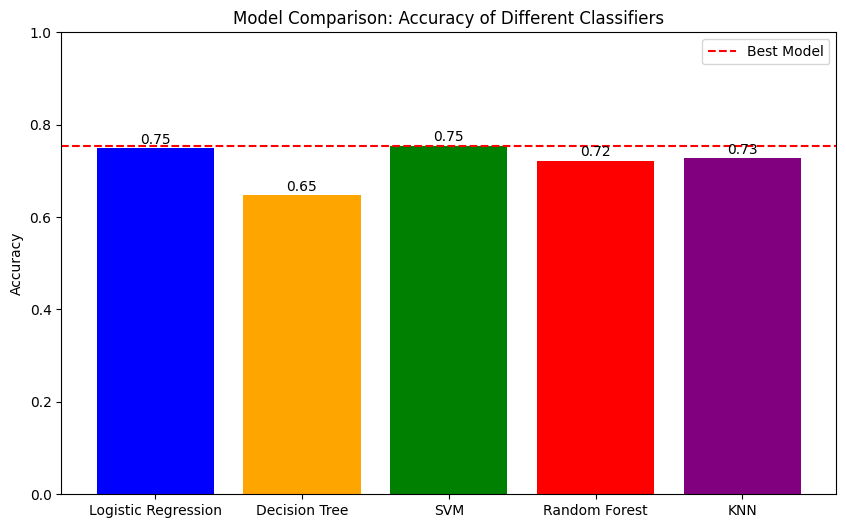

In [77]:
accuracies = [accuracy_lr, accuracy_dt, accuracy_svm, accuracy_rf, accuracy_knn]
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'KNN']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy of Different Classifiers')
plt.axhline(y=max(accuracies), color='red', linestyle='--', label='Best Model')

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.legend()
plt.show()

Chọn mô hình KNeighborsClassifier

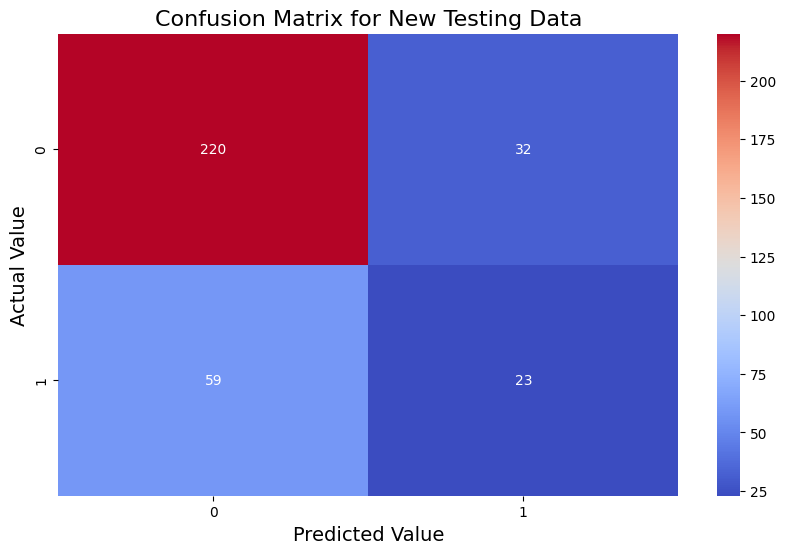

In [78]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)
plt.show()

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình KNN với số lượng hàng xóm k là 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình trên dữ liệu huấn luyện
knn_model.fit(x_train, y_train)

# Tính toán xác suất dự đoán trên tập kiểm tra
y_probs_knn = knn_model.predict_proba(x_test)[:, 1]  # Xác suất thuộc lớp 1 (hút thuốc)

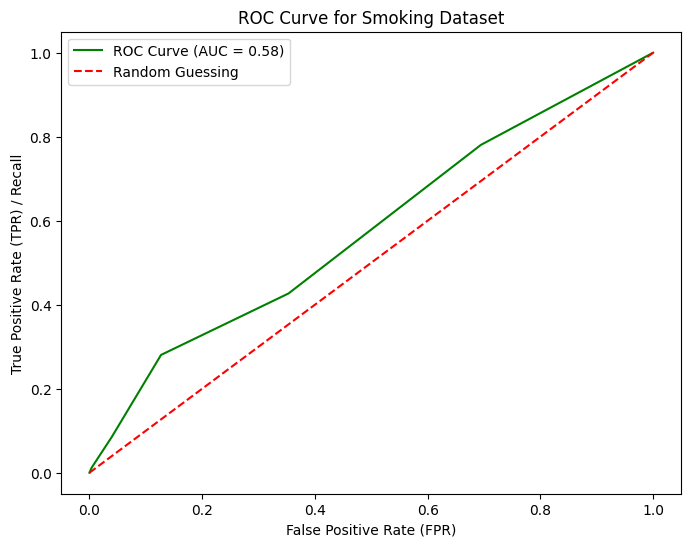

In [81]:
# Calculate ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
auc_score = roc_auc_score(y_test, y_probs_knn)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', color='red')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('ROC Curve for Smoking Dataset')
plt.legend()
plt.show()

### 7. Dự đoán mô hình với dữ liệu mới

In [82]:
def predict_smoking(gender, age, marital_status, highest_qualification, nationality, ethnicity, gross_income):
  x =np.zeros(len(x_train.columns))
  x[0] = gender
  x[1] = age
  x[2] = marital_status
  x[3] = highest_qualification
  x[4] = nationality
  x[5] = ethnicity
  x[6] = gross_income

  return knn_model.predict([x])[0]

In [83]:
result = predict_smoking(1,	23,	2,	1,	1,	3,	4)
print(result)
if result == 0:
        print("Người này không hút thuốc.")
elif result == 1:
        print("Người này có hút thuốc.")


0
Người này không hút thuốc.
